In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, chi2_contingency
from scipy import stats
import numpy as np

combined_df = pd.read_csv('..\\DATA\\combined_data.csv')


C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\1594221700.py:7: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('..\\DATA\\combined_data.csv')


In [2]:
pd.set_option('display.max_columns', None)
combined_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,199806,2,2050,199806,2,2100,2149256,5669115,MARYLAND,24.0,1998,June,Tornado,C,23,GARRETT,PBZ,02-JUN-98 20:50:00,EST,02-JUN-98 21:00:00,0,0,0,0,1M,NaN,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F2,3.0,300.0,NaN,NaN,NaN,NaN,4.0,W,FRIENDSVILLE,3.0,SW,FRIENDSVILLE,39.67,-79.50,39.63,-79.45,An F2 tornado passed southeast through souther...,NaN,PDC
1,199806,2,2038,199806,2,2042,2149257,5669116,MARYLAND,24.0,1998,June,Tornado,C,23,GARRETT,PBZ,02-JUN-98 20:38:00,EST,02-JUN-98 20:42:00,0,0,0,0,.5M,NaN,NWS STORM SURVEY,2.0,NaN,NaN,NaN,F2,2.5,700.0,NaN,NaN,NaN,NaN,1.0,NW,FINZEL,2.0,SE,FINZEL,39.73,-78.97,39.70,-78.93,An F2 tornado passed through the town of Finze...,NaN,PDC
2,199806,13,1545,199806,13,1545,2149637,5668053,OKLAHOMA,40.0,1998,June,Tornado,C,11,BLAINE,OUN,13-JUN-98 15:45:00,CST,13-JUN-98 15:45:00,1,0,0,0,NaN,NaN,LAW ENFORCEMENT,NaN,NaN,NaN,NaN,F0,0.1,10.0,NaN,NaN,NaN,NaN,1.0,W,LONGDALE,1.0,W,LONGDALE,36.13,-98.57,36.13,-98.57,"Summary of events of June 13, 1998:During the ...",The Blaine County Sheriff reported a brief tor...,PDC
3,199806,2,2045,199806,2,2050,2149255,5669114,WEST VIRGINIA,54.0,1998,June,Tornado,C,77,PRESTON,PBZ,02-JUN-98 20:45:00,EST,02-JUN-98 20:50:00,0,0,0,0,5M,2M,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F2,4.0,300.0,NaN,NaN,NaN,NaN,1.0,NW,GLADE FARMS,3.0,SE,GLADE FARMS,39.72,-79.55,39.67,-79.50,An F2 tornado passed southeast through souther...,NaN,PDC
4,199806,2,1720,199806,2,1728,2149234,5668877,PENNSYLVANIA,42.0,1998,June,Tornado,C,129,WESTMORELAND,PBZ,02-JUN-98 17:20:00,EST,02-JUN-98 17:28:00,0,0,0,0,NaN,NaN,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F1,6.0,300.0,NaN,NaN,NaN,NaN,3.0,NW,IRWIN,3.0,SE,MANOR,40.37,-79.75,40.30,-79.63,An F1 tornado touched down 5 miles northwest o...,NaN,PDC


In [3]:
#Filtering for necessary columns in DF

columns_need = [
    'BEGIN_YEARMONTH','BEGIN_DATE_TIME', 'YEAR', 'STATE', 'MONTH_NAME', 
    'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 
    'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 
    'TOR_F_SCALE', 'TOR_LENGTH', 'BEGIN_LON', 'BEGIN_LAT'
]
df = combined_df[columns_need]
df['INJURIES_TOTAL']=df['INJURIES_DIRECT']+df['INJURIES_INDIRECT']
df['DEATHS_TOTAL']=df['DEATHS_DIRECT']+df['DEATHS_INDIRECT']
df.head()

C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\793084218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INJURIES_TOTAL']=df['INJURIES_DIRECT']+df['INJURIES_INDIRECT']
C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\793084218.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEATHS_TOTAL']=df['DEATHS_DIRECT']+df['DEATHS_INDIRECT']


,BEGIN_YEARMONTH,BEGIN_DATE_TIME,YEAR,STATE,MONTH_NAME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,BEGIN_LON,BEGIN_LAT,INJURIES_TOTAL,DEATHS_TOTAL
0,199806,02-JUN-98 20:50:00,1998,MARYLAND,June,0,0,0,0,1M,NaN,F2,3.0,-79.50,39.67,0,0
1,199806,02-JUN-98 20:38:00,1998,MARYLAND,June,0,0,0,0,.5M,NaN,F2,2.5,-78.97,39.73,0,0
2,199806,13-JUN-98 15:45:00,1998,OKLAHOMA,June,1,0,0,0,NaN,NaN,F0,0.1,-98.57,36.13,1,0
3,199806,02-JUN-98 20:45:00,1998,WEST VIRGINIA,June,0,0,0,0,5M,2M,F2,4.0,-79.55,39.72,0,0
4,199806,02-JUN-98 17:20:00,1998,PENNSYLVANIA,June,0,0,0,0,NaN,NaN,F1,6.0,-79.75,40.37,0,0


In [4]:
#Converting property damage from string to integer

def convert_damage_to_millions(value):
    if isinstance(value, str):
        value = value.strip()  
        if value == '': 
            return None  
        if 'M' in value: 
            value = value.replace('M', '').strip()
            if value == '': 
                return None 
            return float(value) * 1_000_000
        elif 'K' in value:
            value = value.replace('K', '').strip()
            if value == '': 
                return None 
            return float(value) * 1_000
        else:
            try:
                return float(value)  
            except ValueError:
                return None 
    elif isinstance(value, (int, float)):
        return value
    else:
        return None  

df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].apply(convert_damage_to_millions)
df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].fillna(0)

C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\3381420839.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].apply(convert_damage_to_millions)
C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\3381420839.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].fillna(0)


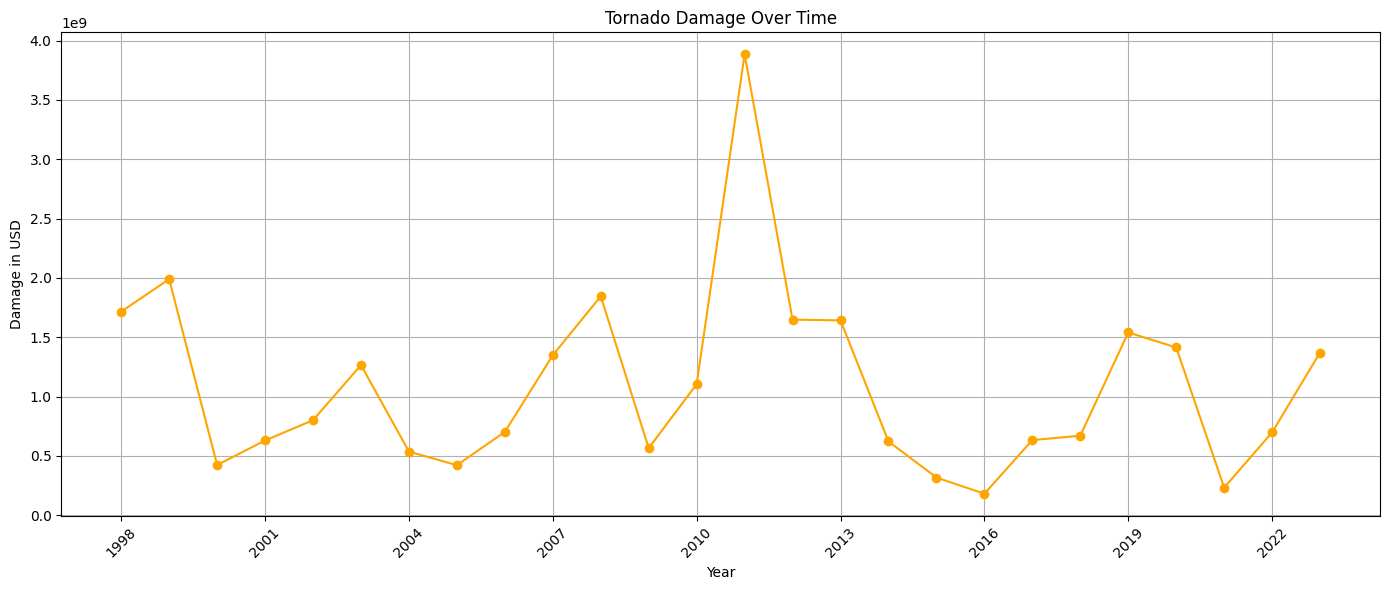

In [7]:
#Defining function to create line plot
def plot_with_specific_years(x_values, y_values, title, xlabel, ylabel, color='blue'):
    plt.figure(figsize=(14, 6))  
    plt.plot(x_values, y_values, marker='o', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    ax = plt.gca()
    ax.set_xticks(x_values[::3])  
    ax.set_xticklabels(x_values[::3].astype(str), rotation=45)  

    plt.grid(True)
    plt.tight_layout()
    plt.show()

tornado_damage = df.groupby(df['YEAR'])['DAMAGE_PROPERTY'].sum()

#Plotting tornado damage by year as lineplot
plot_with_specific_years(
    tornado_damage.index, 
    tornado_damage.values,
    title='Tornado Damage Over Time',
    xlabel='Year', 
    ylabel='Damage in USD', 
    color='orange'
)

In [8]:
#Calculating number of tornadoes per year
num_per_year  = df.groupby('YEAR').size().reset_index(name='NUM_TORNADOES')
num_per_year

,YEAR,NUM_TORNADOES
0,1998,1529
1,1999,1520
2,2000,1169
3,2001,1351
4,2002,1040
5,2003,1535
6,2004,1947
7,2005,1343
8,2006,1263
9,2007,1242


Slope: -0.5846153846153849
Intercept: 2583.292307692308
R-squared: 0.0002412552759276469
P-value: 0.9399687443213751


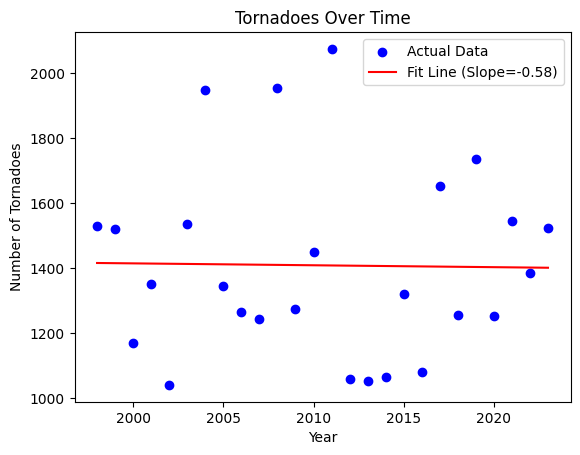

In [9]:
#Perfroming regression test to find frequency of torandoes has not changed from 1999-2023 as p-value > 0.05
years = num_per_year['YEAR']
tornadoes = num_per_year['NUM_TORNADOES']

#capturing values of test
slope, intercept, r_value, p_value, std_err = linregress(years, tornadoes)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

#plotting results
plt.scatter(years, tornadoes, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Tornadoes Over Time')
plt.legend()
plt.show()


Slope: -9820740.694017092
Intercept: 20829574613.398285
R-squared: 0.009091438710563943
P-value: 0.6431253407723168


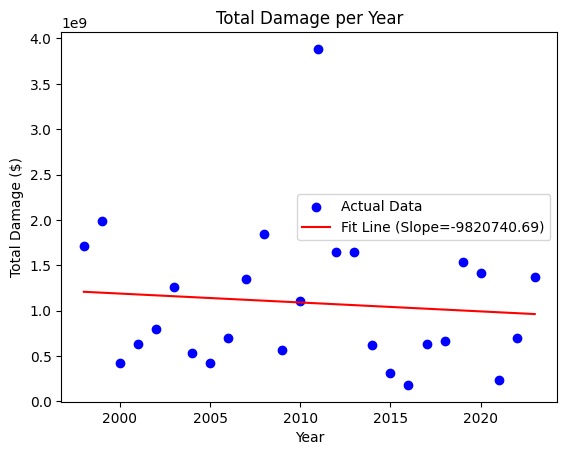

In [10]:
#Perfroming regression test to find damage induced by tornadoes has not changed from 1999-2023 as p-value > 0.05
dam_per_year  = df.groupby('YEAR')['DAMAGE_PROPERTY'].sum().reset_index()
years = dam_per_year['YEAR']
total_damage = dam_per_year['DAMAGE_PROPERTY']

#capturing values from test
slope, intercept, r_value, p_value, std_err = linregress(years, total_damage)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

#plotting results
plt.scatter(years, total_damage, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Damage ($)')
plt.title('Total Damage per Year')
plt.legend()
plt.show()

Slope: -5896.525391267438
Intercept: 12613239.959170062
R-squared: 0.009477870009827612
P-value: 0.636124545858886


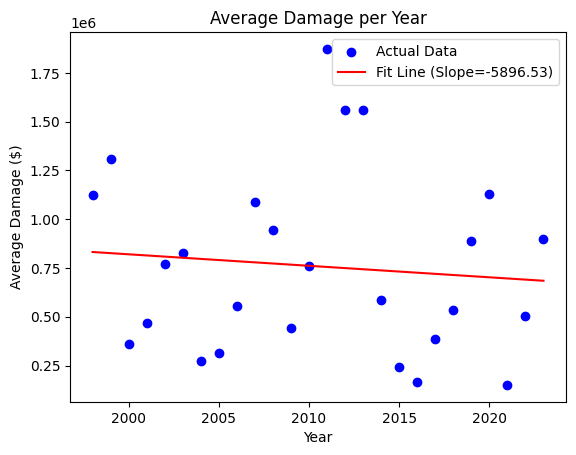

In [11]:
#Perfroming regression test to find average damage induced by tornadoes has not changed from 1999-2023 as p-value > 0.05
avg_dam_per_year  = df.groupby('YEAR')['DAMAGE_PROPERTY'].mean().reset_index()
years = avg_dam_per_year['YEAR']
total_damage = avg_dam_per_year['DAMAGE_PROPERTY']

#capture values from test
slope, intercept, r_value, p_value, std_err = linregress(years, total_damage)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

#plotting results
plt.scatter(years, total_damage, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Average Damage ($)')
plt.title('Average Damage per Year')
plt.legend()
plt.show()

Slope: -0.5955555555555555
Intercept: 1275.3644444444444
R-squared: 0.001891266056413572
P-value: 0.8329315778118441


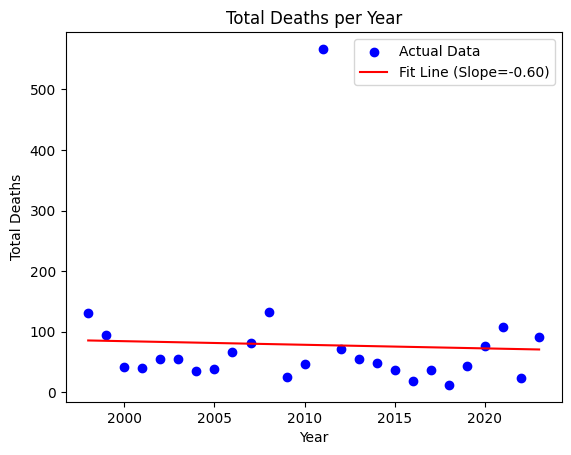

In [12]:
#Perfroming regression test to find deaths induced by tornadoes has not changed from 1999-2023 as p-value > 0.05
deaths_per_year  = df.groupby('YEAR')['DEATHS_TOTAL'].sum().reset_index()
years = deaths_per_year['YEAR']
total_deaths = deaths_per_year['DEATHS_TOTAL']

#capturing values from test
slope, intercept, r_value, p_value, std_err = linregress(years, total_deaths)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

#plotting results
plt.scatter(years, total_deaths, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths per Year')
plt.legend()
plt.show()

Slope: -26.732991452991453
Intercept: 54750.52547008547
R-squared: 0.03853922845546724
P-value: 0.3364638343666011


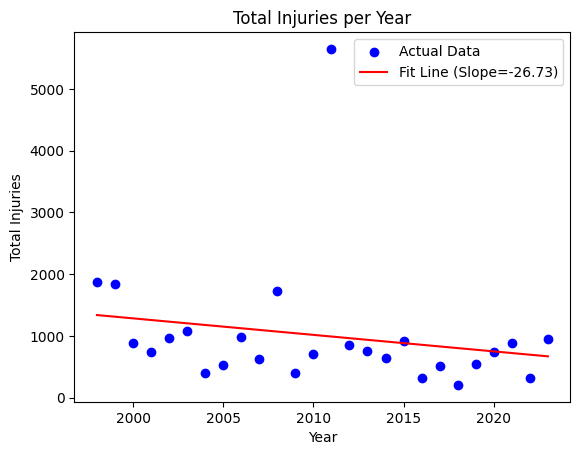

In [13]:
#Perfroming regression test to find injuries induced by tornadoes has not changed from 1999-2023 as p-value > 0.05
injuries_per_year  = df.groupby('YEAR')['INJURIES_TOTAL'].sum().reset_index()
years = injuries_per_year['YEAR']
total_injuries = injuries_per_year['INJURIES_TOTAL']

#capturing values from test
slope, intercept, r_value, p_value, std_err = linregress(years, total_injuries)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

#plotting results
plt.scatter(years, total_injuries, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.title('Total Injuries per Year')
plt.legend()
plt.show()

In [14]:
#Calculating proprotion of deadly tornadoes
total_tornadoes = df.groupby('YEAR').size().reset_index(name='TOTAL_TORNADOES')
deadly_tornadoes = df[df['DEATHS_TOTAL'] > 1].groupby('YEAR').size().reset_index(name='NUMBER_OF_DEADLY_TORNADOES')
tornado_prop = pd.merge(total_tornadoes, deadly_tornadoes, on='YEAR', how='left')
tornado_prop

,YEAR,TOTAL_TORNADOES,NUMBER_OF_DEADLY_TORNADOES
0,1998,1529,17
1,1999,1520,14
2,2000,1169,5
3,2001,1351,11
4,2002,1040,14
5,2003,1535,12
6,2004,1947,5
7,2005,1343,5
8,2006,1263,10
9,2007,1242,13


In [15]:
#Value count of tornadoes by F scale
df.TOR_F_SCALE.value_counts()

TOR_F_SCALE
EF0    11542
EF1     8197
F0      7933
F1      3320
EF2     2291
EFU     1097
F2      1048
EF3      614
F3       345
EF4      132
F4        68
EF5       14
F5         5
Name: count, dtype: int64

In [16]:
#Calcualting values counts for simple F scale values
category_order = ['FU','F0', 'F1', 'F2', 'F3', 'F4', 'F5']
df['F_SCALE_SIMPLE'] = df['TOR_F_SCALE'].str[-2:]
df['F_SCALE_SIMPLE'] = pd.Categorical(df['F_SCALE_SIMPLE'], categories=category_order, ordered=True)

df.F_SCALE_SIMPLE.value_counts()

C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\3878681004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F_SCALE_SIMPLE'] = df['TOR_F_SCALE'].str[-2:]
C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\3878681004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F_SCALE_SIMPLE'] = pd.Categorical(df['F_SCALE_SIMPLE'], categories=category_order, ordered=True)


F_SCALE_SIMPLE
F0    19475
F1    11517
F2     3339
FU     1097
F3      959
F4      200
F5       19
Name: count, dtype: int64

In [17]:
#Creating a pivot table to view frquency of tornadoes by severity per year
f_scale_count = df.groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_pivot = df.pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_pivot.reset_index(inplace=True)
f_scale_pivot.head()

F_SCALE_SIMPLE,YEAR,FU,F0,F1,F2,F3,F4,F5
0,1998,0,914,416,137,48,11,3
1,1999,0,888,381,164,69,16,2
2,2000,0,763,293,83,27,3,0
3,2001,0,866,324,122,31,8,0
4,2002,0,663,243,90,38,6,0


In [18]:
# Perform Chi-square test of independence on f_scale_pivot data
# Test fails indicating dependency
data = f_scale_pivot
stat, p, dof, expected = chi2_contingency(data) # interpret p-value 
alpha = 0.05 
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

p value is 0.0
Dependent (reject H0)
chi2 statistic:     5974.8
p-value:            0
degrees of freedom: 175
expected frequencies:
[[2.07435807e+03 4.35324317e+01 7.72829634e+02 4.57031008e+02
  1.32502087e+02 3.80561550e+01 7.93663295e+00 7.53980130e-01]
 [2.06965298e+03 4.34336907e+01 7.71076689e+02 4.55994363e+02
  1.32201544e+02 3.79698354e+01 7.91863095e+00 7.52269940e-01]
 [1.86380514e+03 3.91137727e+01 6.94385344e+02 4.10641130e+02
  1.19052768e+02 3.41933528e+01 7.13104333e+00 6.77449116e-01]
 [1.97143415e+03 4.13724727e+01 7.34483961e+02 4.34354392e+02
  1.25927699e+02 3.61679137e+01 7.54283914e+00 7.16569718e-01]
 [1.78911178e+03 3.75462595e+01 6.66557342e+02 3.94184386e+02
  1.14281641e+02 3.28230291e+01 6.84526154e+00 6.50299846e-01]
 [2.08082757e+03 4.36682006e+01 7.75239933e+02 4.58456396e+02
  1.32915334e+02 3.81748445e+01 7.96138570e+00 7.56331642e-01]
 [2.32372802e+03 4.87657039e+01 8.65735719e+02 5.11973211e+02
  1.48430889e+02 4.26310940e+01 8.89073909e+00 8.4462021

In [19]:
# Processes tornado data before 2003, counts F-scale occurrences by year, creates a pivot table, 
# and sums counts across all years.
df['YEAR']=df['YEAR'].astype(int)
f_scale_count = df[df['YEAR']<2003].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_first = df[df['YEAR']<2003].pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_first.reset_index(inplace=True)
f_scale_first
combined_row = f_scale_first.sum(numeric_only=True).reset_index()
combined_row

C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\31734296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR']=df['YEAR'].astype(int)


,F_SCALE_SIMPLE,0
0,YEAR,10000
1,FU,0
2,F0,4094
3,F1,1657
4,F2,596
5,F3,213
6,F4,44
7,F5,5


In [20]:
# Filters out rows with a count of 10,000 from 'combined_row', renames columns for clarity, 
# and stores the result in 'FCOUNT'
first_5=combined_row
first_5= first_5[first_5[0] != 10000]
first_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'First_5_Count'}, inplace=True)
FCOUNT=first_5
first_5

C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\2131578314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'First_5_Count'}, inplace=True)


,F_SCALE,First_5_Count
1,FU,0
2,F0,4094
3,F1,1657
4,F2,596
5,F3,213
6,F4,44
7,F5,5


In [21]:
# Counts F-scale occurrences for years > 2018, creates a pivot table for years < 2018, 
# sums counts, filters out 40,150, and renames columns in 'last_5'.
df['YEAR']=df['YEAR'].astype(int)
f_scale_count = df[df['YEAR']>2018].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_first = df[df['YEAR']<2018].pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_first.reset_index(inplace=True)
combined_row1 = f_scale_first.sum(numeric_only=True).reset_index()
last_5=combined_row1
last_5= last_5[last_5[0] != 40150]
last_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'Last_5_Count'}, inplace=True)
last_5

C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\4093109911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR']=df['YEAR'].astype(int)
C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\4093109911.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'Last_5_Count'}, inplace=True)


,F_SCALE,Last_5_Count
1,FU,99
2,F0,15909
3,F1,8389
4,F2,2547
5,F3,782
6,F4,171
7,F5,19


In [22]:
# Adds 'Last_5_Count' to 'FCOUNT', filters out rows with 'First_5_Count' of 0, 
# and converts both 'First_5_Count' and 'Last_5_Count' to integers.
FCOUNT['Last_5_Count'] = last_5['Last_5_Count']
FCOUNT=FCOUNT[FCOUNT['First_5_Count'] != 0]
FCOUNT['First_5_Count']=FCOUNT['First_5_Count'].astype(int)
FCOUNT['Last_5_Count']=FCOUNT['Last_5_Count'].astype(int)

FCOUNT

C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\1495488655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FCOUNT['Last_5_Count'] = last_5['Last_5_Count']
C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\1495488655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FCOUNT['First_5_Count']=FCOUNT['First_5_Count'].astype(int)
C:\Users\zaidf\AppData\Local\Temp\ipykernel_24572\1495488655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,F_SCALE,First_5_Count,Last_5_Count
2,F0,4094,15909
3,F1,1657,8389
4,F2,596,2547
5,F3,213,782
6,F4,44,171
7,F5,5,19


In [23]:
# Performs a Chi-square test on tornado counts before and after 2018 to check for significant changes in distribution.
# Outputs the p-value, test conclusion, Chi-square statistic, degrees of freedom, expected frequencies, and contingency table.
np.set_printoptions(suppress=True)

contingency_table = FCOUNT.pivot_table(index='F_SCALE', values=['First_5_Count',"Last_5_Count"], fill_value=0)
contingency_table
data = contingency_table
stat, p, dof, expected = chi2_contingency(data) # interpret p-value 
alpha = 0.05 
print("p value is " + str(p)) 
if p <= alpha: 
    print("\nConclusion: The p-value is less than the alpha level of 0.05.")
    print("This means the differences between the observed frequencies and expected frequencies are statistically significant.")
    print("We reject the null hypothesis (H0) and conclude that the distributions of tornado counts have changed significantly over time.")
else: 
    print("\nConclusion: The p-value is greater than the alpha level of 0.05.")
    print("This means the differences between the observed frequencies and expected frequencies are not statistically significant.")
    print("We fail to reject the null hypothesis (H0) and conclude that the distributions of tornado counts have not changed significantly over time.")

print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)
print(contingency_table)


p value is 4.721464940708155e-14

Conclusion: The p-value is less than the alpha level of 0.05.
This means the differences between the observed frequencies and expected frequencies are statistically significant.
We reject the null hypothesis (H0) and conclude that the distributions of tornado counts have changed significantly over time.
chi2 statistic:     71.616
p-value:            4.7215e-14
degrees of freedom: 5
expected frequencies:
[[ 3840.11581363 16162.88418637]
 [ 1928.60088305  8117.39911695]
 [  603.38369256  2539.61630744]
 [  191.01710916   803.98289084]
 [   41.27505374   173.72494626]
 [    4.60744786    19.39255214]]
         First_5_Count  Last_5_Count
F_SCALE                             
F0                4094         15909
F1                1657          8389
F2                 596          2547
F3                 213           782
F4                  44           171
F5                   5            19


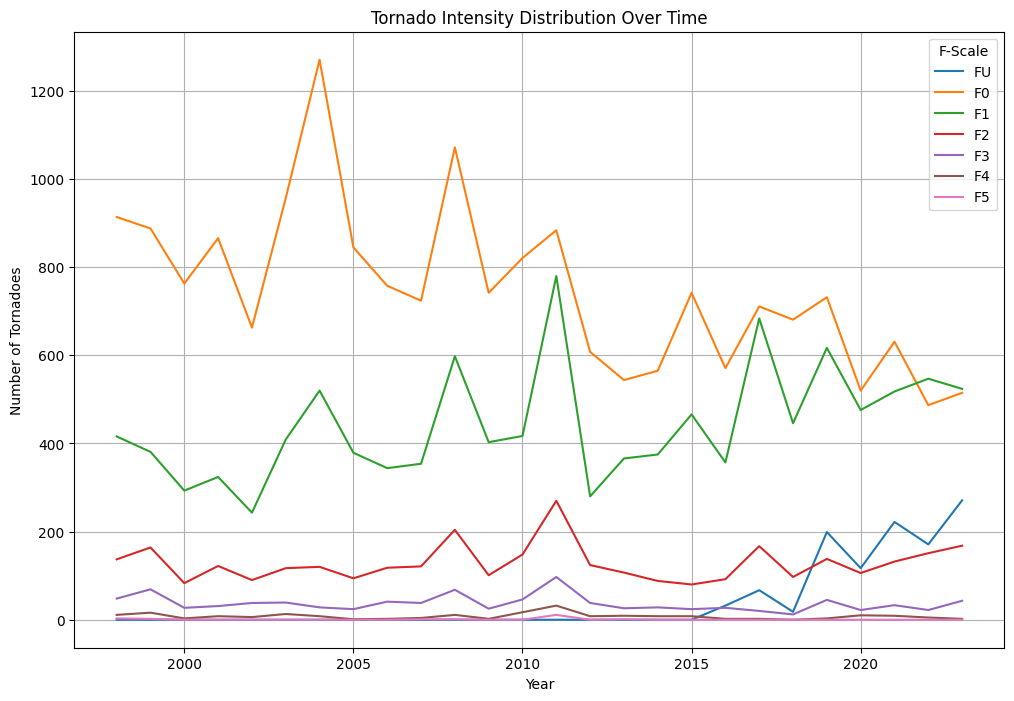

In [24]:
# Groups tornado counts by year and F-scale, creates a line plot showing intensity distribution over time.
f_scale_count = df.groupby(['YEAR', 'F_SCALE_SIMPLE']).size().unstack(fill_value=0)
f_scale_count.plot(kind='line', figsize=(12, 8))
plt.title('Tornado Intensity Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.legend(title='F-Scale')
plt.grid(True)
plt.show()


In [29]:
# Filters tornado data for specific states and years, creates a contingency table of occurrences, 
# performs a Chi-square test, and evaluates the statistical significance of differences in tornado occurrences.
states_of_interest = ['TEXAS', 'MISSISSIPPI', 'OKLAHOMA', 'KANSAS']
years_of_interest = [1999, 2007, 2015, 2023]

state_tornadoes = df[df['STATE'].str.upper().isin(states_of_interest)]
state_tornadoes = state_tornadoes[state_tornadoes['YEAR'].isin(years_of_interest)]

contingency_table = state_tornadoes.groupby(['STATE', 'YEAR']).size().unstack(fill_value=0)

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p}")
print("Expected frequencies:")
print(expected)

alpha = 0.05
if p < alpha:
    print("The differences in tornado occurrences across states and years are statistically significant .")
else:
    print("The differences in tornado occurrences across states and years are not statistically significant .")


Chi-square statistic: 189.0236864849154
Degrees of freedom: 9
P-value: 6.58862011161003e-36
Expected frequencies:
[[107.82227098 109.20460779 135.0082282   67.96489303]
 [ 56.47833242  57.2024136   70.71859572  35.60065826]
 [114.75370269 116.224904   143.68732858  72.33406473]
 [188.94569391 191.3680746  236.5858475  119.10038398]]
The differences in tornado occurrences across states and years are statistically significant .


In [30]:
#Difference between mean damage ($) first 5 years, last 5 years
#Difference between mean frequency per year first 5 years, last 5 years
#Difference between proportion deadly first 5 years, last 5 years

In [31]:
# Extracts the last two characters of 'TOR_F_SCALE' to create the 'F_SCALE' column.
# Splits the data into two subsets: 'df_first' for years before 2003 and 'df_last' for years after 2018.
df['F_SCALE'] = df['TOR_F_SCALE'].str[-2:]
df_first = df[df['YEAR']<2003]
df_last= df[df['YEAR']>2018]

In [32]:
# Performs an independent t-test to compare mean property damage between years before 2003 and after 2018.
# Prints the t-statistic, p-value, and a statement about the comparison.
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_first['DAMAGE_PROPERTY'], df_last['DAMAGE_PROPERTY'])
print(t_stat)
print(p_value)
print('The mean property damage in the first 5 years is not significantly different\nthan the mean property damage in the last 5 years')

0.727158597924928
0.467140927205836
The mean property damage in the first 5 years is not significantly different
than the mean property damage in the last 5 years


In [33]:
# Calculates the yearly tornado counts for years before 2003 ('df_first') and after 2018 ('df_last').
# Prints the resulting frequency tables for each period.
first_freq = df_first.groupby('YEAR').size().reset_index(name='TORNADO_COUNT')
last_freq = df_last.groupby('YEAR').size().reset_index(name='TORNADO_COUNT')
print(first_freq)
print(last_freq)

   YEAR  TORNADO_COUNT
0  1998           1529
1  1999           1520
2  2000           1169
3  2001           1351
4  2002           1040
   YEAR  TORNADO_COUNT
0  2019           1734
1  2020           1251
2  2021           1545
3  2022           1383
4  2023           1523


In [34]:
# Performs an independent t-test comparing the mean yearly tornado counts before 2003 and after 2018.
# Prints the t-statistic, p-value, and a statement regarding the comparison.
t_stat, p_value = ttest_ind(first_freq['TORNADO_COUNT'], last_freq['TORNADO_COUNT'])
print(t_stat)
print(p_value)
print('The mean tornado frequency of the first 5 years is not significantly different than the\nmean tornado frequency of the last 5 years')

-1.3116916485687427
0.22601345229852496
The mean tornado frequency of the first 5 years is not significantly different than the
mean tornado frequency of the last 5 years


In [35]:
# Identifies tornadoes with direct or indirect injuries for years before 2003 and after 2018.
# Calculates yearly counts of injury-causing tornadoes and merges them with overall tornado counts for each period.
# Prints the resulting tables with total tornado counts and injury-related counts for both time periods.
deadly_tornadoes = df_first[(df_first['INJURIES_DIRECT'] > 0) | (df_first['INJURIES_INDIRECT'] > 0)]
deadly_tornado_frequency = deadly_tornadoes.groupby('YEAR').size().reset_index(name='INJURY_TORNADO_COUNT')
first_freq = first_freq.merge(deadly_tornado_frequency, on='YEAR', how='left')
first_freq = first_freq[['YEAR','TORNADO_COUNT','INJURY_TORNADO_COUNT']]
print(first_freq)
deadly_tornadoes = df_last[(df_last['INJURIES_DIRECT'] > 0) | (df_last['INJURIES_INDIRECT'] > 0)]
deadly_tornado_frequency = deadly_tornadoes.groupby('YEAR').size().reset_index(name='INJURY_TORNADO_COUNT')
last_freq = last_freq.merge(deadly_tornado_frequency, on='YEAR', how='left')
last_freq = last_freq[['YEAR','TORNADO_COUNT','INJURY_TORNADO_COUNT']]
print(last_freq)

   YEAR  TORNADO_COUNT  INJURY_TORNADO_COUNT
0  1998           1529                   168
1  1999           1520                   140
2  2000           1169                    86
3  2001           1351                   120
4  2002           1040                    95
   YEAR  TORNADO_COUNT  INJURY_TORNADO_COUNT
0  2019           1734                    79
1  2020           1251                    74
2  2021           1545                    76
3  2022           1383                    76
4  2023           1523                    97


In [42]:
# Calculates and prints the total number of tornadoes and the number with injuries for years before 2003 and after 2018.
first_5_total = df_first.shape[0]
first_5_injury = df_first[df_first['INJURIES_TOTAL']>0].shape[0]
print(first_5_total)
print(first_5_injury)
last_5_total = df_last.shape[0]
last_5_injury = df_last[df_last['INJURIES_TOTAL']>0].shape[0]
print(last_5_total)
print(last_5_injury)



6609
609
7436
402


In [37]:
# Performs a two-sided z-test to compare the proportion of injury-causing tornadoes between the first and last 5-year periods.
# Prints the z-statistic, p-value, and a statement about the comparison.
from statsmodels.stats.proportion import proportions_ztest

success_cnts = np.array([last_5_injury, first_5_injury])
total_cnts = np.array([last_5_total, first_5_total])
test_stat, pval = proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('Two sided z-test: z = {:.4f}, p value = {:.4f}'.format(test_stat, pval))
print('The proportion of tornados that caused injuries is statistically higher in the first 5 years\nthan the last 5 years')

Two sided z-test: z = -8.7166, p value = 0.0000
The proportion of tornados that caused injuries is statistically higher in the first 5 years
than the last 5 years


In [47]:
# Creates a pivot table of tornado counts by F-scale for the first and last 5-year periods.

contingency_table = FCOUNT.pivot_table(index='F_SCALE', values=['First_5_Count',"Last_5_Count"], fill_value=0)
contingency_table


Number of violent tornadoes in the first 5 years: 262
Number of violent tornadoes in the last 5 years: 972


In [48]:
# Calculates and prints the total number of violent tornadoes (F3, F4, F5) in the first and last 5-year periods.
violent_first_5 = FCOUNT[FCOUNT['F_SCALE'].isin(['F3', 'F4', 'F5'])]['First_5_Count'].sum()
violent_last_5 = FCOUNT[FCOUNT['F_SCALE'].isin(['F3', 'F4', 'F5'])]['Last_5_Count'].sum()

print("Number of violent tornadoes in the first 5 years:", violent_first_5)
print("Number of violent tornadoes in the last 5 years:", violent_last_5)


Number of violent tornadoes in the first 5 years: 262
Number of violent tornadoes in the last 5 years: 972


In [52]:
# Performs a two-sided z-test to compare the proportion of violent tornadoes between the first and last 5-year periods.
# Prints the z-statistic, p-value, and a statement about the comparison.
success_cnts = np.array([violent_last_5, violent_first_5])
total_cnts = np.array([last_5_total, first_5_total])
print(success_cnts)
print(total_cnts)
test_stat, pval = proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('Two sided z-test: z = {:.4f}, p value = {:.4f}'.format(test_stat, pval))
print('There is a statistically significant difference between the proportion of violent tornados in the last 5 years compared to the first 5 years')

[972 262]
[7436 6609]
Two sided z-test: z = 19.0299, p value = 0.0000
There is a statistically significant difference between the proportion of "successes" (e.g., violent incidents) in the last 5 periods compared to the first 5 periods. The large z-score suggests that the observed proportions differ significantly from each other
